In [1]:
%load_ext autoreload
%autoreload 2
from helper import *
%config InlineBackend.figure_format='retina'

In [2]:
alldata = abcd_data()
alldata_1 = get_data_with_followups(alldata, followups = '1y_follow_up')
abcd_baseline = abcd_data(measurement = 'baseline', load = False, df = alldata_1)
baseline_clean = prepare_data(abcd_baseline)
item_list = filter_polychoric_corr(baseline_clean)

cbcl_q08_p with cbcl_q10_p


Can't concentrate, can't pay attention for long with 
Can't sit still, restless, or hyperactive


cbcl_q08_p with cbcl_q78_p


Can't concentrate, can't pay attention for long with 
Inattentive or easily distracted 


cbcl_q16_p with cbcl_q97_p


Cruelty, bullying, or meanness to others with 
Threatens people


cbcl_q20_p with cbcl_q21_p


Destroys their own things with 
Destroys things belonging to their family or others


cbcl_q21_p with cbcl_q106_p


Destroys things belonging to their family or others with 
Vandalism


cbcl_q22_p with cbcl_q28_p


Disobedient at home  with 
Breaks rules at home, school or elsewhere 


cbcl_q23_p with cbcl_q28_p


Disobedient at school with 
Breaks rules at home, school or elsewhere 


cbcl_q25_p with cbcl_q48_p


Doesn't get along with other kids with 
Not liked by other kids


cbcl_q40_p with cbcl_q70_p


Hears sound or voices that aren't there with 
Sees things that aren't there


cbcl_q53_p with cbcl_q55_p


Overeating

In [3]:
aggregate_dict = {"cbcl_q8182_steals": ['cbcl_q81_p', 'cbcl_q82_p'], 
                  "cbcl_q165797_attacks/threatens/bullies": ['cbcl_q57_p', 'cbcl_q16_p', 'cbcl_q97_p'],
                  "cbcl_q56cf_stomach_issues":['cbcl_q56c_p', 'cbcl_q56f_p'],
                  "cbcl_q5355_weight_problems":['cbcl_q53_p', 'cbcl_q55_p'],
                  "cbcl_q4070_hallucinaitons": ['cbcl_q70_p', 'cbcl_q40_p'],
                  "cbcl_q2548_peer_problems": ['cbcl_q25_p', 'cbcl_q48_p'],
                  "cbcl_q222328_disobeys_rules": ['cbcl_q28_p', 'cbcl_q23_p', 'cbcl_q22_p'],
                  "cbcl_q21106_destroys": ['cbcl_q20_p', 'cbcl_q106_p', 'cbcl_q21_p'],
                  "cbcl_q081078_distracted/hyperactive": ['cbcl_q10_p', 'cbcl_q78_p', 'cbcl_q08_p']}

baseline_data = aggregate_items(baseline_clean, item_list, aggregate_dict)
baseline_polycorr = common.polychoric.polychoric_correlation_serial(get_question_items(baseline_data, 'cbcl_q').to_numpy().T,0,3)


In [8]:
EFA_df = get_question_items(baseline_data, 'cbcl_q')


In [4]:
# fit factor analysis 
efa = FactorAnalyzer(n_factors = 101, rotation = None, is_corr_matrix=True)
efa.fit(baseline_polycorr)


FactorAnalyzer(is_corr_matrix=True, n_factors=101, rotation=None,
               rotation_kwargs={})

In [5]:
efa.get_communalities()  

array([0.99546775, 0.99736713, 0.99552402, 0.99560987, 0.99900458,
       0.99525884, 0.99530086, 0.99621116, 0.99683581, 0.99940897,
       0.99549918, 1.00276366, 0.99599576, 1.01531166, 0.99579117,
       0.9954698 , 0.99534059, 0.99747454, 0.99539932, 0.99527493,
       0.99581461, 0.99527825, 0.99552562, 1.00194815, 0.99657791,
       0.99856109, 1.00024933, 0.99656547, 0.99584878, 0.99607948,
       0.99576452, 0.99638528, 0.99530565, 0.99612488, 0.99704132,
       0.99855552, 0.99598473, 0.99710396, 0.99905651, 0.99654429,
       0.99587334, 0.99820611, 0.99635468, 0.99951384, 0.99533998,
       0.99816993, 0.99528809, 0.99836445, 1.27697065, 1.02213297,
       0.99515291, 0.99592357, 0.99538774, 0.99696787, 0.99519556,
       0.99528912, 1.01106625, 0.99708863, 0.99902779, 0.99717321,
       1.00847269, 0.99691605, 0.9965121 , 0.99576497, 0.995994  ,
       0.99566028, 0.99585601, 0.99537319, 1.00616109, 0.99838578,
       0.99643449, 0.99611791, 0.99763114, 0.99750073, 0.99620

In [6]:
pd.DataFrame(efa.get_factor_variance())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,34.322713,5.247985,3.069387,2.663847,2.531931,2.282422,2.005798,1.773574,1.754600,1.638715,...,0.100823,0.074579,0.069389,0.062769,0.023608,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.339829,0.051960,0.030390,0.026375,0.025069,0.022598,0.019859,0.017560,0.017372,0.016225,...,0.000998,0.000738,0.000687,0.000621,0.000234,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.339829,0.391789,0.422179,0.448554,0.473622,0.496221,0.516080,0.533640,0.551012,0.567237,...,1.001004,1.001742,1.002429,1.003051,1.003284,1.003284,1.003284,1.003284,1.003284,1.003284


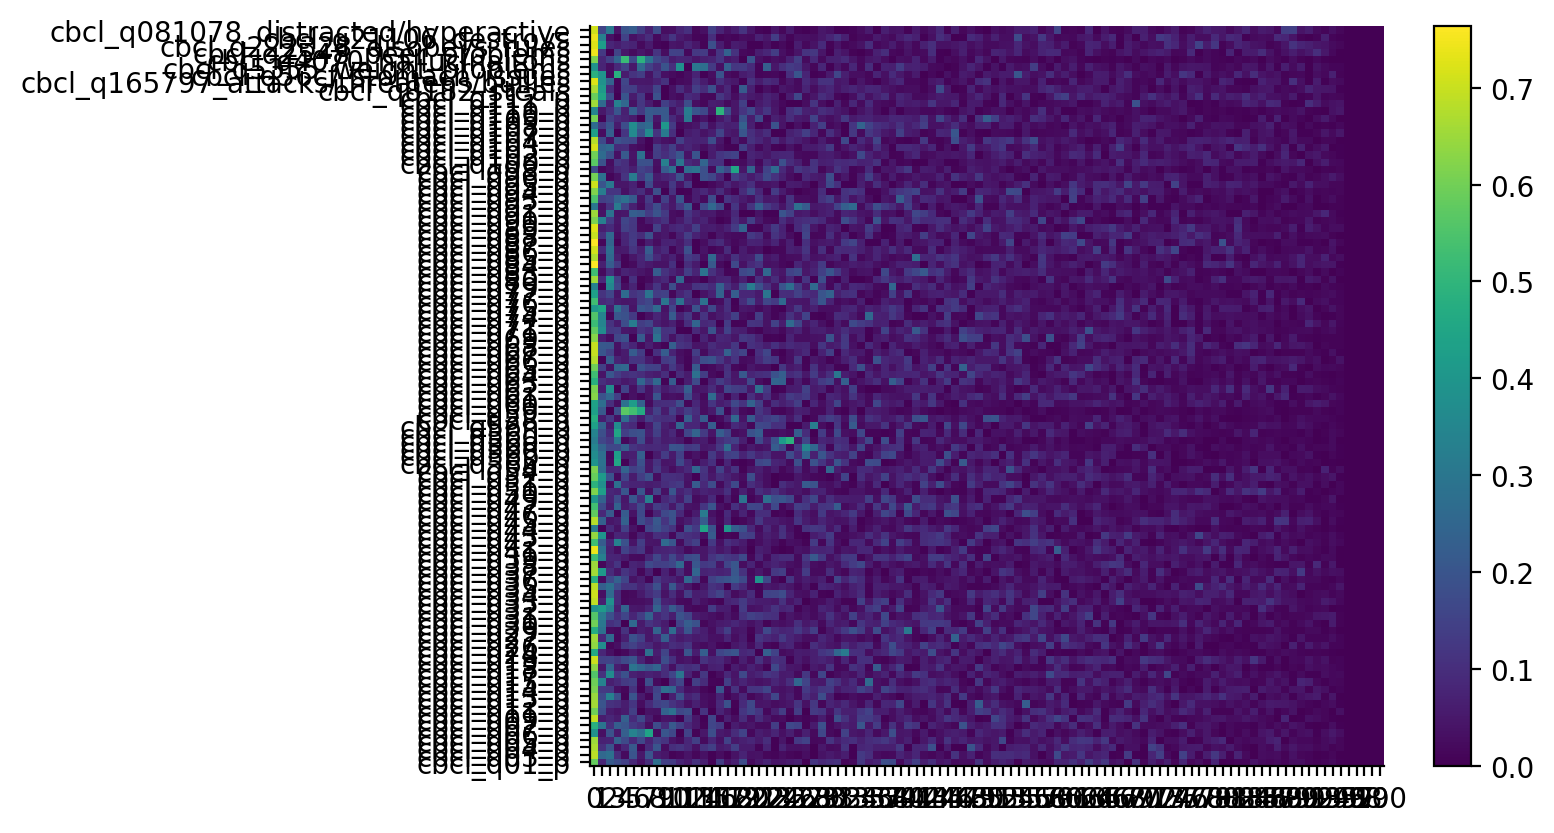

In [9]:
loadings_df = pd.DataFrame(efa.loadings_, index = EFA_df.columns)
plot_diagrams(loadings_df, diagram = "Matrix")

In [10]:
ev, v = efa.get_eigenvalues()
above_1 = np.unique((ev > 1), return_counts=True)[1][1] 
above_mean = sum(ev > ev.mean())
print(f"Inspection of the eigenvalues suggest that {above_mean} factors should be extracted.")
pd.DataFrame(efa.get_eigenvalues())



Inspection of the eigenvalues suggest that 20 factors should be extracted.


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,34.327713,5.252985,3.074387,2.668847,2.536931,2.287422,2.010798,1.778574,1.759600,1.643715,...,0.105823,0.079579,0.074389,0.067769,0.028608,0.004605,-0.023194,-0.034102,-0.059133,-0.699896
1,34.330138,5.253872,3.074395,2.693659,2.609381,2.324530,2.065688,1.789959,1.761673,1.644461,...,0.104535,0.080472,0.072778,0.065816,0.027559,0.005197,-0.023300,-0.031771,-0.054586,-0.477986


In [11]:
from bokeh.models import Span
scree = plots.scree_plot(ev, plot_difference= False)
hline = Span(location=1, dimension='width', line_width=1)
scree.renderers.extend([hline])
scree.xaxis.axis_label = 'Factor'
scree.yaxis.axis_label = 'Eigenvalue'
show(scree)


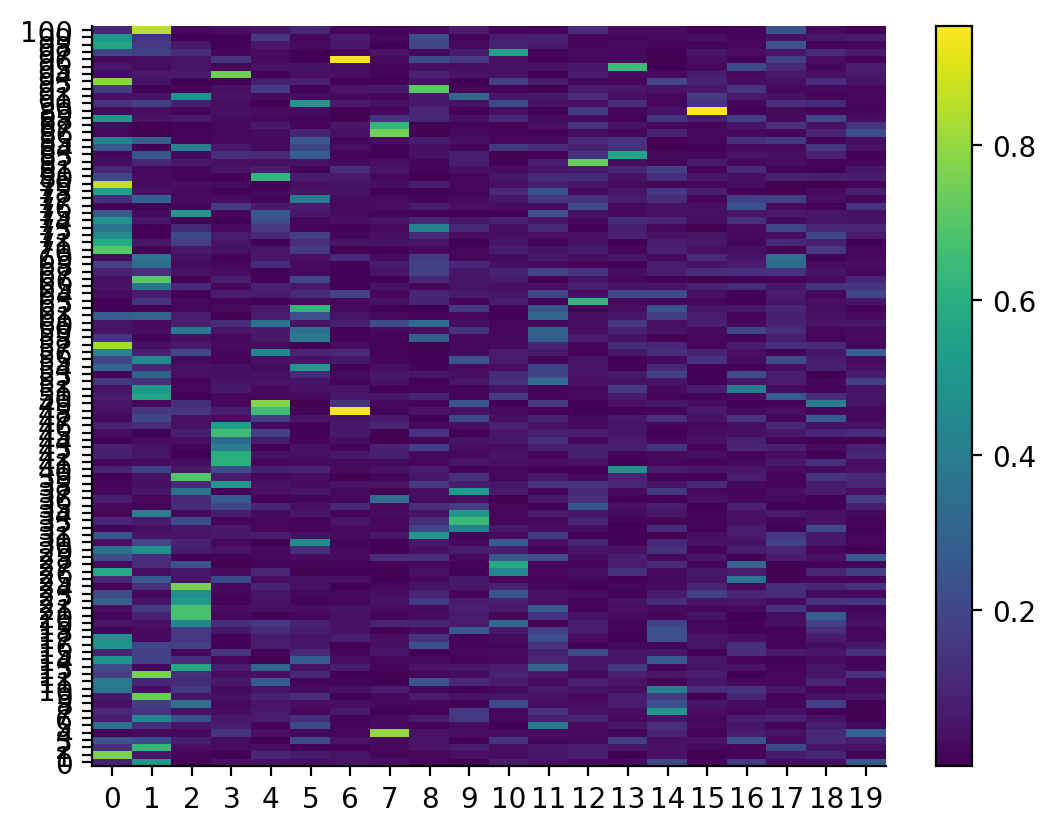

In [17]:
efa_20F = FactorAnalyzer(n_factors = 20, rotation ='geomin_obl', is_corr_matrix=True)
efa_20F.fit(baseline_polycorr)
rotated_loadings_20F = pd.DataFrame(efa_20F.loadings_).abs()
plot_diagrams(rotated_loadings_20F, "Matrix")

In [20]:
rotated_loadings_20F.set_index(EFA_df.columns, inplace = True)
rotated_loadings_6F = get_primary_loadings(rotated_loadings_20F)
get_primary_loadings(rotated_loadings_20F)

,0,1,2,3,5,9
cbcl_q67_p,0.421675,0.082131,0.207491,0.017131,0.096685,0.025986
cbcl_q06_p,0.004687,0.020656,0.019339,0.143582,0.020558,0.036813
cbcl_q39_p,0.229200,0.121630,0.005371,0.010141,0.029512,0.026974
cbcl_q01_p,0.082094,0.510151,0.000013,0.044170,0.033945,0.000647
cbcl_q107_p,0.014129,0.001669,0.009010,0.018111,0.096247,0.025053
...,...,...,...,...,...,...
cbcl_q4070_hallucinaitons,0.022699,0.030017,0.046429,0.141911,0.003067,0.157278
cbcl_q87_p,0.584041,0.057435,0.172682,0.050988,0.124838,0.006430
cbcl_q11_p,0.105171,0.144549,0.037514,0.030379,0.016037,0.151172
cbcl_q09_p,0.080760,0.432176,0.237205,0.058325,0.124189,0.154132


In [26]:
abcd = abcd_dict("abcd_cbcl01")
loadings_data = rotated_loadings_6F.rename(index=abcd)
loadings_data.rename({0: 'F1', 1: 'F2', 2: 'F3', 3: 'F4', 5: 'F5', 9: 'F6'}, axis=1, inplace = True)


In [21]:
# F1 Externalizing (Antagonistic)
F1 = loadings_data.sort_values("F1", ascending = False)
F1.rename(index=abcd, inplace= True)
F1 = pd.DataFrame(F1["F1"])
F1_styler = F1.round(4).style.applymap(color)
F1_styler

,F1
Temper tantrums or hot temper,0.868900
Screams a lot,0.821600
cbcl_q165797_attacks/threatens/bullies,0.783800
Argues a lot,0.760500
"Stubborn, sullen, or irritable",0.700500
Sudden changes in mood or feelings,0.584000
Gets in many fights,0.576800
cbcl_q222328_disobeys_rules,0.564000
Teases a lot,0.546600
Whining,0.504400


In [22]:
# F2 Neurodevelopmental
F2 = loadings_data.sort_values("F2", ascending = False)
F2.rename(index=abcd, inplace= True)
F2 = pd.DataFrame(F2["F2"])
F2_styler = F2.round(4).style.applymap(color)
F2_styler

,F2
cbcl_q081078_distracted/hyperactive,0.852000
Daydreams or gets lost in their thoughts,0.752700
Confused or seems to be in a fog,0.734900
Stares blankly,0.701400
Fails to finish things they start,0.637000
Poor school work,0.564700
Acts too young for their age,0.510200
Poorly coordinated or clumsy,0.506700
Impulsive or acts without thinking,0.471600
Repeats certain acts over and over; compulsions,0.443700


In [23]:
# F3 Internalizing 
F3 = loadings_data.sort_values("F3", ascending = False)
F3.rename(index=abcd, inplace= True)
F3 = pd.DataFrame(F3["F3"])
F3_styler = F3.round(4).style.applymap(color)
F3_styler

,F3
Feels worthless or inferior,0.754600
Feels too guilty,0.695200
Fears they might think or do something bad,0.677500
Feels they have to be perfect,0.676300
Deliberately harms self or attempts suicide,0.580000
Feels or complains that no one loves them,0.513500
Talks about killing self,0.505900
Worries,0.481100
Feels others are out to get them,0.475600
Fears going to school,0.441400


In [24]:
# F4 Somatoform
F4 = loadings_data.sort_values("F4", ascending = False)
F4.rename(index=abcd, inplace= True)
F4= pd.DataFrame(F4["F4"])
F4_styler = F4.round(4).style.applymap(color)
F4_styler

,F4
cbcl_q56cf_stomach_issues,0.745500
"Vomiting, throwing up",0.658600
Aches or pains (not stomach or headaches),0.608500
Headaches,0.606400
Other (physical problems without known physical cause),0.532700
Feels dizzy or lightheaded,0.505500
Problems with eyes (not if corrected by glasses),0.398500
Rashes or other skin problems,0.332400
"Constipated, doesn't move bowels",0.270800
Overtired without good reason,0.227200


In [27]:
# F5 Detachment
F5 = loadings_data.sort_values("F5", ascending = False)
F5.rename(index=abcd, inplace= True)
F5 = pd.DataFrame(F5["F5"])
F5_styler = F5.round(4).style.applymap(color)
F5_styler

,F5
Too shy or timid,0.622100
Refuses to talk,0.504200
"Withdrawn, doesn't get involved with others",0.504000
Would rather be alone than with others,0.465400
"Secretive, keeps things to self",0.389700
Talks too much,0.389200
Self-conscious or easily embarrassed,0.339100
"Underactive, slow moving, or lacks energy",0.277500
Demands a lot of attention,0.272900
Unusually loud,0.261400


In [28]:
# F5 Externalizing (Disinhibited)
F6 = loadings_data.sort_values("F6", ascending = False)
F6.rename(index=abcd, inplace= True)
F6 = pd.DataFrame(F6["F6"])
F6_styler = F6.round(4).style.applymap(color)
F6_styler

,F6
"Nervous, highstrung, or tense",0.648900
Too fearful or anxious,0.517300
Nervous movements or twitching,0.506000
Bites fingernails,0.413100
Worries,0.317700
"Fears certain animals, situations, or places, other than school",0.258400
Plays with own sex parts too much,0.252100
Repeats certain acts over and over; compulsions,0.239300
"Picks nose, skin, or other parts of body",0.214500
Nightmares,0.171600


In [29]:
loadings_data_new = get_primary_loadings(rotated_loadings_6F, delete = True)
loadings_df = EFA_df[loadings_data_new.index]

#remove low loadings 
list_to_drop = []

for row_index in loadings_data_new.index:
    row_vals = loadings_data_new.loc[row_index].to_numpy() 

    if (row_vals < 0.3).all():
        list_to_drop.append(row_index)

loadings_df_new = loadings_df.drop(loadings_df[list_to_drop], axis = 1)
loadings_df_new

,cbcl_q112_p,cbcl_q66_p,cbcl_q75_p,cbcl_q09_p,cbcl_q52_p,cbcl_q15_p,cbcl_q84_p,cbcl_q89_p,cbcl_q32_p,cbcl_q41_p,...,cbcl_q21106_destroys,cbcl_q27_p,cbcl_q14_p,cbcl_q37_p,cbcl_q87_p,cbcl_q56g_p,cbcl_q12_p,cbcl_q91_p,cbcl_q165797_attacks/threatens/bullies,cbcl_q01_p
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
clear_loadings_data = rotated_loadings_6F.loc[loadings_df_new.columns]
clear_loadings_df1 = clear_loadings_data.rename(index=abcd)
clear_loadings_df = clear_loadings_df1.rename({0: 'F1', 1: 'F2', 2: 'F3', 3: 'F4', 5: 'F5', 9: 'F6'}, axis=1)


In [33]:
#loadings_data[loadings_data['F1'].sort_values(ascending=False) > .3]
primaryL_F1 = clear_loadings_df[clear_loadings_df['F1'] > .35].sort_values('F1', ascending=False)
primaryL_F2 = clear_loadings_df[clear_loadings_df['F2'] > .35].sort_values('F2', ascending=False)
primaryL_F3 = clear_loadings_df[clear_loadings_df['F3'] > .35].sort_values('F3', ascending=False)
primaryL_F4 = clear_loadings_df[clear_loadings_df['F4'] > .35].sort_values('F4', ascending=False)
primaryL_F5 = clear_loadings_df[clear_loadings_df['F5'] > .35].sort_values('F5', ascending=False)
primaryL_F6 = clear_loadings_df[clear_loadings_df['F6'] > .35].sort_values('F6', ascending=False)


primaryL_list = [primaryL_F1, primaryL_F2, primaryL_F3, primaryL_F4, primaryL_F5, primaryL_F6]  # List of your dataframes
ordered_PL = pd.concat(primaryL_list)
ordered_PL



,F1,F2,F3,F4,F5,F6
Temper tantrums or hot temper,0.868904,0.023721,0.036627,0.027996,0.037810,0.018105
Screams a lot,0.821648,0.040487,0.063830,0.026091,0.000504,0.021976
cbcl_q165797_attacks/threatens/bullies,0.783784,0.048258,0.000231,0.001254,0.088457,0.001397
Argues a lot,0.760516,0.056927,0.011919,0.000315,0.064585,0.037223
"Stubborn, sullen, or irritable",0.700506,0.001037,0.058414,0.039830,0.166228,0.018367
Sudden changes in mood or feelings,0.584041,0.057435,0.172682,0.050988,0.124838,0.006430
Gets in many fights,0.576826,0.031566,0.056072,0.027103,0.003140,0.006698
cbcl_q222328_disobeys_rules,0.563990,0.163561,0.056420,0.006505,0.027492,0.028754
Teases a lot,0.546576,0.044476,0.023827,0.007427,0.049486,0.011774
Whining,0.504409,0.051949,0.070719,0.028645,0.012792,0.037679


In [34]:
def make_bold(val):

    bold = 'bold' if val > .35 else ''

    return 'font-weight: %s' % bold

ordered_PL_bold = ordered_PL.style.applymap(make_bold)
ordered_PL_bold

,F1,F2,F3,F4,F5,F6
Temper tantrums or hot temper,0.868904,0.023721,0.036627,0.027996,0.037810,0.018105
Screams a lot,0.821648,0.040487,0.063830,0.026091,0.000504,0.021976
cbcl_q165797_attacks/threatens/bullies,0.783784,0.048258,0.000231,0.001254,0.088457,0.001397
Argues a lot,0.760516,0.056927,0.011919,0.000315,0.064585,0.037223
"Stubborn, sullen, or irritable",0.700506,0.001037,0.058414,0.039830,0.166228,0.018367
Sudden changes in mood or feelings,0.584041,0.057435,0.172682,0.050988,0.124838,0.006430
Gets in many fights,0.576826,0.031566,0.056072,0.027103,0.003140,0.006698
cbcl_q222328_disobeys_rules,0.563990,0.163561,0.056420,0.006505,0.027492,0.028754
Teases a lot,0.546576,0.044476,0.023827,0.007427,0.049486,0.011774
Whining,0.504409,0.051949,0.070719,0.028645,0.012792,0.037679


In [39]:
# 2 factors: Externalizing & Internalizing
efa = FactorAnalyzer(2, 'varimax', is_corr_matrix=True)
efa.fit(baseline_polycorr)

# loading matrix
loadings_2 = pd.DataFrame(efa.loadings_).abs()
loadings_2.set_index(EFA_df.columns, inplace=True)

# factor scores
factor_scores_2 = pd.DataFrame(efa.transform(baseline_polycorr))

loadings_2.rename(index=abcd, inplace=True)
styler2_1 = pd.DataFrame(loadings_2[0])
styler2_1.sort_values(by = 0,ascending=False, inplace= True)
styler2_1.round(4).style.applymap(color) # Broad Externalizing

styler2_2 = pd.DataFrame(loadings_2[1])
styler2_2.sort_values(by = 1,ascending=False, inplace= True)
styler2_2.round(4).style.applymap(color) # Broad Internalizing


/Users/sarah/miniconda3/envs/ABCD/lib/python3.9/site-packages/factor_analyzer/factor_analyzer.py:765: UserWarning: Could not find original mean and standard deviation; usingthe mean and standard deviation from the current data set.
  warnings.warn(


,0
cbcl_q222328_disobeys_rules,0.817700
cbcl_q165797_attacks/threatens/bullies,0.788600
cbcl_q21106_destroys,0.762800
cbcl_q8182_steals,0.758800
Gets in many fights,0.751600
Impulsive or acts without thinking,0.730400
Lying or cheating,0.726200
Doesn't seem to feel guilty after misbehaving,0.705600
Argues a lot,0.665100
Swearing or obscene language,0.658100


In [43]:
# 3 factors
efa = FactorAnalyzer(3, 'varimax', is_corr_matrix=True)
efa.fit(baseline_polycorr)

# loading matrix
loadings_3 = pd.DataFrame(efa.loadings_).abs()
loadings_3.set_index(EFA_df.columns, inplace=True)

# factor scores
factor_scores_3 = pd.DataFrame(efa.transform(baseline_polycorr))

loadings_3.rename(index=abcd, inplace=True)
styler3_1 = pd.DataFrame(loadings_3[0])
styler3_1.sort_values(by = 0,ascending=False, inplace= True)
styler3_1.round(4).style.applymap(color) # Broad Externalizing

styler3_2 = pd.DataFrame(loadings_3[1])
styler3_2.sort_values(by = 1,ascending=False, inplace= True)
styler3_2.round(4).style.applymap(color) # Broad Internalizing

styler3_3 = pd.DataFrame(loadings_3[2])
styler3_3.sort_values(by = 2,ascending=False, inplace= True)
styler3_3.round(4).style.applymap(color) # Neurodevelopmental


/Users/sarah/miniconda3/envs/ABCD/lib/python3.9/site-packages/factor_analyzer/factor_analyzer.py:765: UserWarning: Could not find original mean and standard deviation; usingthe mean and standard deviation from the current data set.
  warnings.warn(


,0
cbcl_q165797_attacks/threatens/bullies,0.813200
cbcl_q222328_disobeys_rules,0.786100
Gets in many fights,0.730300
cbcl_q21106_destroys,0.714800
Argues a lot,0.698900
Temper tantrums or hot temper,0.686900
cbcl_q8182_steals,0.678100
Lying or cheating,0.668900
Doesn't seem to feel guilty after misbehaving,0.657800
Screams a lot,0.653100


In [51]:
# 4 factors
efa = FactorAnalyzer(4, 'varimax', is_corr_matrix=True)
efa.fit(baseline_polycorr)

# loading matrix
loadings_4 = pd.DataFrame(efa.loadings_).abs()
loadings_4.set_index(EFA_df.columns, inplace=True)

# factor scores
factor_scores_4 = pd.DataFrame(efa.transform(baseline_polycorr))

loadings_4.rename(index=abcd, inplace=True)
styler4_1 = pd.DataFrame(loadings_4[0])
styler4_1.sort_values(by = 0,ascending=False, inplace= True)
styler4_1.round(4).style.applymap(color) # Broad Externalizing

styler4_2 = pd.DataFrame(loadings_4[1])
styler4_2.sort_values(by = 1,ascending=False, inplace= True)
styler4_2.round(4).style.applymap(color) # Broad Internalizing

styler4_3 = pd.DataFrame(loadings_4[2])
styler4_3.sort_values(by = 2,ascending=False, inplace= True)
styler4_3.round(4).style.applymap(color) # Neurodevelopmental

styler4_4 = pd.DataFrame(loadings_4[3])
styler4_4.sort_values(by = 3,ascending=False, inplace= True)
styler4_4.round(4).style.applymap(color) # Somatoform


/Users/sarah/miniconda3/envs/ABCD/lib/python3.9/site-packages/factor_analyzer/factor_analyzer.py:765: UserWarning: Could not find original mean and standard deviation; usingthe mean and standard deviation from the current data set.
  warnings.warn(


,0
cbcl_q165797_attacks/threatens/bullies,0.790500
cbcl_q222328_disobeys_rules,0.787800
Gets in many fights,0.728200
cbcl_q21106_destroys,0.709100
cbcl_q8182_steals,0.688100
Argues a lot,0.682300
Lying or cheating,0.680800
Temper tantrums or hot temper,0.658300
Doesn't seem to feel guilty after misbehaving,0.656800
Impulsive or acts without thinking,0.656400


In [55]:
# 5 factors
efa = FactorAnalyzer(5, 'varimax', is_corr_matrix=True)
efa.fit(baseline_polycorr)

# loading matrix
loadings_5 = pd.DataFrame(efa.loadings_).abs()
loadings_5.set_index(EFA_df.columns, inplace=True)

# factor scores
factor_scores_5 = pd.DataFrame(efa.transform(baseline_polycorr))

loadings_5.rename(index=abcd, inplace=True)
styler5_1 = pd.DataFrame(loadings_5[0])
styler5_1.sort_values(by = 0,ascending=False, inplace= True)
styler5_1.round(4).style.applymap(color) # Broad Externalizing

styler5_2 = pd.DataFrame(loadings_5[1])
styler5_2.sort_values(by = 1,ascending=False, inplace= True)
styler5_2.round(4).style.applymap(color) # Broad Internalizing

styler5_3 = pd.DataFrame(loadings_5[2])
styler5_3.sort_values(by = 2,ascending=False, inplace= True)
styler5_3.round(4).style.applymap(color) # Neurodevelopmental

styler5_4 = pd.DataFrame(loadings_5[3])
styler5_4.sort_values(by = 3,ascending=False, inplace= True)
styler5_4.round(4).style.applymap(color) # Somatoform

styler5_5 = pd.DataFrame(loadings_5[4])
styler5_5.sort_values(by = 4,ascending=False, inplace= True)
styler5_5.round(4).style.applymap(color) # Sex Play



/Users/sarah/miniconda3/envs/ABCD/lib/python3.9/site-packages/factor_analyzer/factor_analyzer.py:765: UserWarning: Could not find original mean and standard deviation; usingthe mean and standard deviation from the current data set.
  warnings.warn(


,1
Feels worthless or inferior,0.674000
"Unhappy, sad, or depressed",0.661300
Worries,0.622400
Feels or complains that no one loves them,0.606300
Feels too guilty,0.604900
Too fearful or anxious,0.597400
Self-conscious or easily embarrassed,0.594000
Feels they have to be perfect,0.581500
"Withdrawn, doesn't get involved with others",0.579600
Fears going to school,0.567400


In [60]:
# 6 factors
efa = FactorAnalyzer(6, 'varimax', is_corr_matrix=True)
efa.fit(baseline_polycorr)

# loading matrix
loadings_6 = pd.DataFrame(efa.loadings_).abs()
loadings_6.set_index(EFA_df.columns, inplace=True)

# factor scores
factor_scores_6 = pd.DataFrame(efa.transform(baseline_polycorr))

loadings_6.rename(index=abcd, inplace=True)
styler6_1 = pd.DataFrame(loadings_6[0])
styler6_1.sort_values(by = 0,ascending=False, inplace= True)
styler6_1.round(4).style.applymap(color) # Externalizing

styler6_2 = pd.DataFrame(loadings_6[1])
styler6_2.sort_values(by = 1,ascending=False, inplace= True)
styler6_2.round(4).style.applymap(color) # Internalizing

styler6_3 = pd.DataFrame(loadings_6[2])
styler6_3.sort_values(by = 2,ascending=False, inplace= True)
styler6_3.round(4).style.applymap(color) # Neurodevelopmental

styler6_4 = pd.DataFrame(loadings_6[3])
styler6_4.sort_values(by = 3,ascending=False, inplace= True)
styler6_4.round(4).style.applymap(color) # Somatoform

styler6_5 = pd.DataFrame(loadings_6[4])
styler6_5.sort_values(by = 4,ascending=False, inplace= True)
styler6_5.round(4).style.applymap(color) # Detachment

styler6_6 = pd.DataFrame(loadings_6[5])
styler6_6.sort_values(by = 5,ascending=False, inplace= True)
styler6_6.round(4).style.applymap(color) # Sex Play


/Users/sarah/miniconda3/envs/ABCD/lib/python3.9/site-packages/factor_analyzer/factor_analyzer.py:765: UserWarning: Could not find original mean and standard deviation; usingthe mean and standard deviation from the current data set.
  warnings.warn(


,1
Feels worthless or inferior,0.672100
Worries,0.649300
"Unhappy, sad, or depressed",0.646000
Too fearful or anxious,0.631700
Feels too guilty,0.626500
Self-conscious or easily embarrassed,0.606000
Feels or complains that no one loves them,0.605400
Feels they have to be perfect,0.605100
Fears they might think or do something bad,0.576800
Sulks a lot,0.552600


In [61]:
# create the labels for the different factor solutions 
name_dict = {
    '1': ['P-Factor'],
    '2': ['Broad Extern.','Broad Intern.'],
    '3': ['Externalizing','Internalizing','Neurodev.'],
    '4': ['Externalizing','Internalizing','Neurodev.','Somatoform'],
    '5': ['Externalizing','Internalizing','Neurodev.','Somatoform','Sex Play'],
    '6':['Externalizing','Internalizing','Neurodev.','Somatoform','Detachment','Sex Play']
}

In [62]:
def factor_extract(df, n_factors: int, rotation_opt: str):
    """Does an EFA on the given df with the specified number of factors and the specified rotation.
       Returns the factor scores and the loadings

    Args:
        df (pd.DataFrame): DataFrame containing the question items
        n_factors (int): Number of factors to extract
        rotation_opt (str): Rotation method applied. Must be one of geomin_obl, varimax, or promax

    Raises:
        ValueError: Error raised when an illegal rotation method is passed

    Returns:
        factor_scores_dict: Dictionary containing one key per factor (factor_x) where the values are DataFrames with
                            participants as rows and factors as columns
        corr_dict: Dictionary with one key per correlation structure between one level and the next (e.g. factor_1factor_2)
                   and values being i x j matrices where i being the number of factors in the smaller solution and j being
                   the number of factors in the larger solution. Entry [i,j] in this matrix should represent the correlation
                   between the two respective factors
    """

    legal_rotation = ["geomin_obl", "varimax", "promax"]

    if rotation_opt not in legal_rotation:
        raise ValueError(f"Rotation must be one of {legal_rotation}.")

    factor_scores_dict = {}
    corr_dict = {}

    for i in range(1, n_factors + 1):
        dict_values = []
        name = "factor_"
        rotation = None if i == 1 else rotation_opt

        factor_sol = FactorAnalyzer(i, rotation, is_corr_matrix= True)
        factor_sol.fit(df)
        factor_scores = pd.DataFrame(
            factor_sol.transform(df)
        )

        for col in factor_scores.columns:
            dict_values.append(factor_scores.iloc[:, col])

        name = name + str(i)
        factor_scores_dict[name] = dict_values

    for i in range(1, len(factor_scores_dict)):
        name = "factor_"
        name1 = name + str(i)
        name2 = name + str(i + 1)

        corrs = np.zeros([i, i + 1])
        for i1, m in enumerate(factor_scores_dict[name1]):
            for i2, n in enumerate(factor_scores_dict[name2]):
                corrs[i1, i2] = n.corr(m, method="pearson", min_periods=None)

        corr_dict[name1 + name2] = corrs

    return factor_scores_dict, corr_dict

In [63]:
# extract the factors successively and get the correlation of factor scores
factor_scores_dict, corr_dict = factor_extract(baseline_polycorr, 6, 'varimax')

/Users/sarah/miniconda3/envs/ABCD/lib/python3.9/site-packages/factor_analyzer/factor_analyzer.py:765: UserWarning: Could not find original mean and standard deviation; usingthe mean and standard deviation from the current data set.
  warnings.warn(
/Users/sarah/miniconda3/envs/ABCD/lib/python3.9/site-packages/factor_analyzer/factor_analyzer.py:765: UserWarning: Could not find original mean and standard deviation; usingthe mean and standard deviation from the current data set.
  warnings.warn(
/Users/sarah/miniconda3/envs/ABCD/lib/python3.9/site-packages/factor_analyzer/factor_analyzer.py:765: UserWarning: Could not find original mean and standard deviation; usingthe mean and standard deviation from the current data set.
  warnings.warn(
/Users/sarah/miniconda3/envs/ABCD/lib/python3.9/site-packages/factor_analyzer/factor_analyzer.py:765: UserWarning: Could not find original mean and standard deviation; usingthe mean and standard deviation from the current data set.
  warnings.warn(
/Use

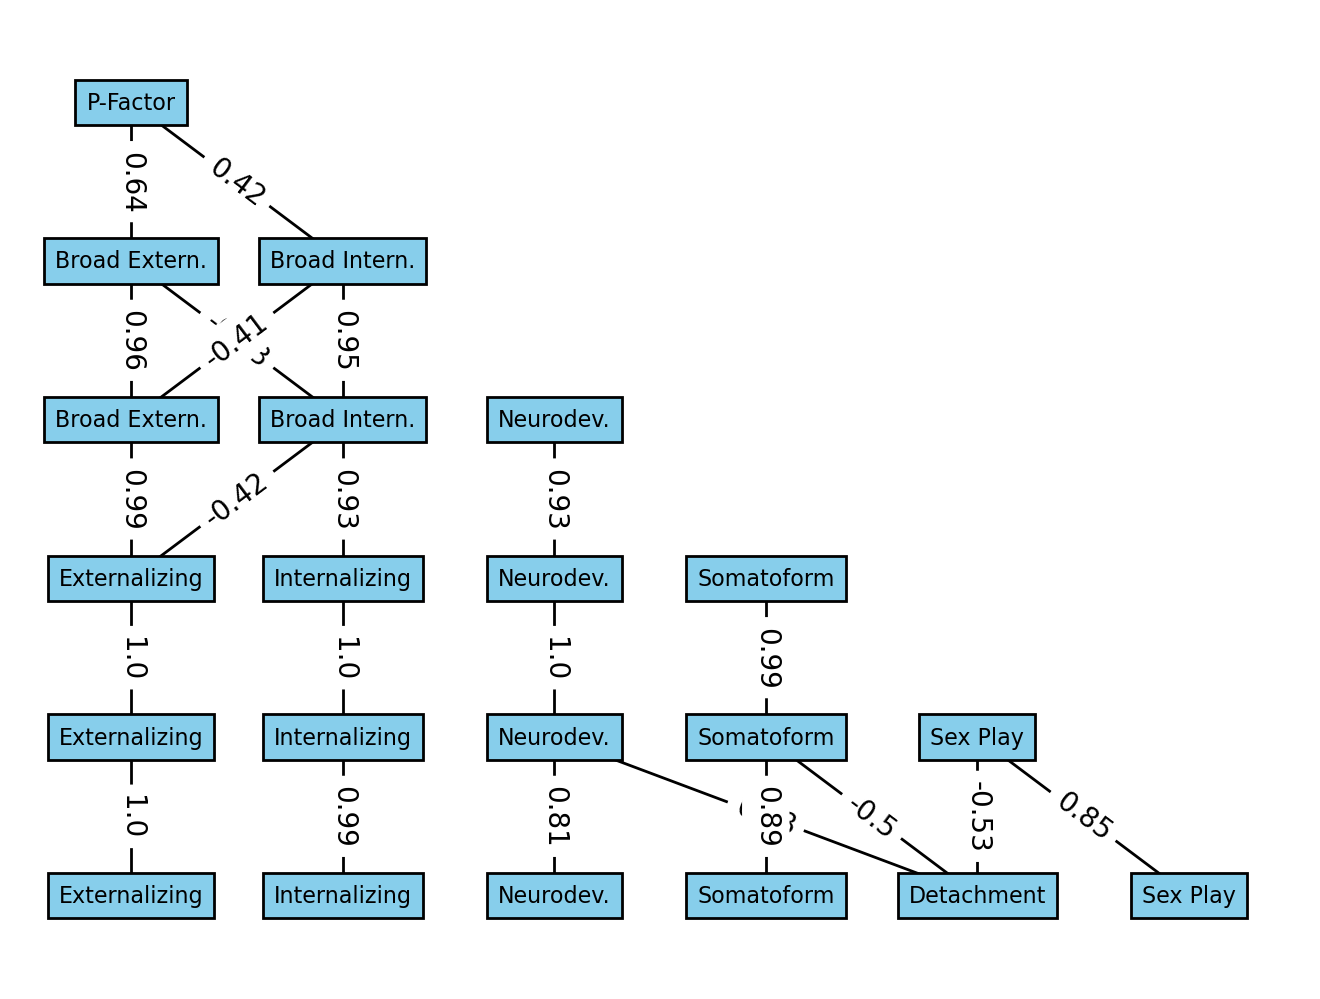

In [65]:
# plot the hierarchical extraction
plot_hierarchy(corr_dict,name_dict,threshold=.4, save_as = 'final_results/PolychoricBaseline_Hierarchy.png') # 65
